# Logistic Regression Project - HEART DISEASE PREDICTION 



**Introduction**

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

**Source**

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Demographic:**

* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target)**

* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report

## Get the Data

In [2]:
data=pd.read_csv('framingham.csv')

**Check the data**

In [3]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Exploratory Data Analysis

<AxesSubplot:>

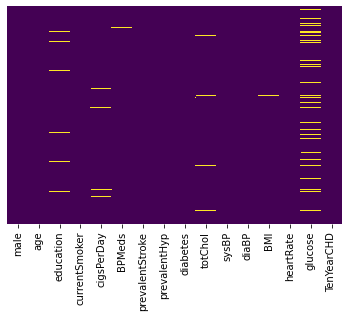

In [6]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

### As we see, there is a missing data in more than one class. We will deal with each of them separately
let's begin with **cigsPerDay**

In [7]:
def impute_cigsPerDay(cols):
    cigsPerDay = cols[0]
    currentSmoker = cols[1]
    
    if pd.isnull(cigsPerDay):
        if currentSmoker == 0:
            return  0
        else:
            return  9
    else:
        return cigsPerDay

If the person is a currentsmoker, we put the average number of cigsPerDay for him, which is equal **9**, but if he is not, equal **0**

In [8]:
data['cigsPerDay'] = data[['cigsPerDay', 'currentSmoker']].apply(impute_cigsPerDay, axis=1)

<AxesSubplot:>

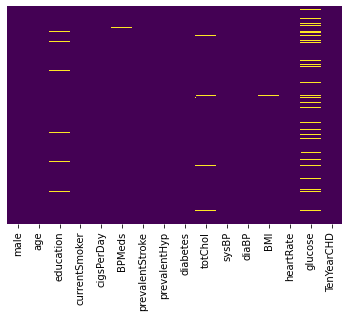

In [9]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

### let's move to another class (BPMeds)

In [10]:
data['BPMeds'].isnull().sum()

53

### The number of missing data in this class is very little comparing with dataset, let's fill it by the mean.

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

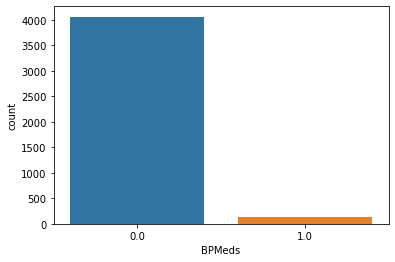

In [11]:
sns.countplot(x='BPMeds',data=data)

**This plot insure and confirm the value that we need to fill the missing cell in this class with it**

In [12]:
data['BPMeds'] = data['BPMeds'].fillna(0,inplace=False)

In [13]:
data['BPMeds'] = data['BPMeds'].astype(int)

<AxesSubplot:>

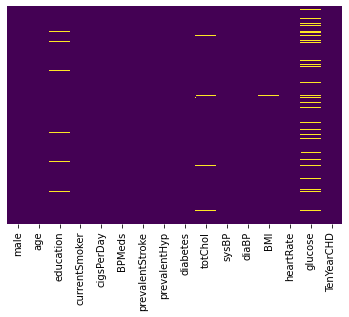

In [14]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

In [15]:
data['totChol'].isnull().sum()

50

We need to know in relation between **totChol** and any another class.

In [16]:
data[data['totChol'].isnull()].head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,1.0,0,0.0,1,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
154,0,38,3.0,1,3.0,1,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
247,0,40,2.0,1,20.0,0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1
429,1,65,NaN,0,0.0,0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
567,0,66,2.0,1,15.0,0,0,1,0,NaN,188.0,108.5,20.49,90.0,NaN,0


<AxesSubplot:xlabel='male', ylabel='count'>

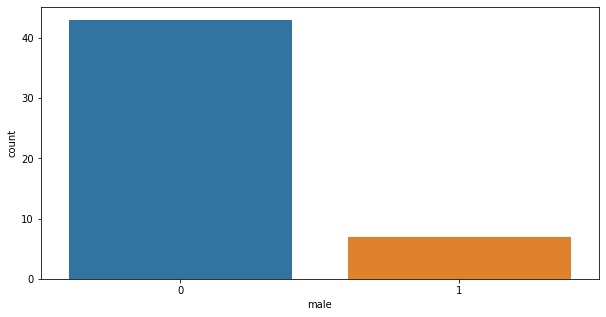

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='male',data=data[data['totChol'].isnull()])

**We saw the missing data for female greater than missing data for male.**

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

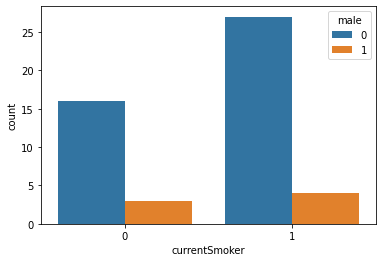

In [18]:
sns.countplot(x='currentSmoker',data=data[data['totChol'].isnull()],hue='male')

* numer of women and **currentSmoker** rather than male and **currentSmoker
* numer of women and **not currentSmoker** rather than male and **not currentSmoker

<AxesSubplot:xlabel='currentSmoker', ylabel='totChol'>

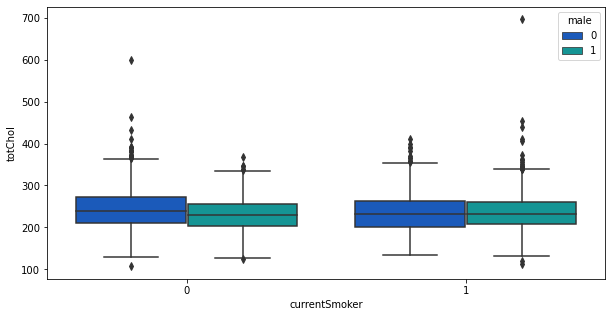

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='currentSmoker',y='totChol',data=data, hue='male' ,palette='winter')

we draw this plot to see the mean for:
* **male** and **cureentSmoker** 
* **male** and **not currentSmoker**
* **female** and **currentSmoker**
* **female** and **not currentSmoker**
 
And we saw the mean is approximatly equals for all of it, Consequently filling missing data in this class with the mean = **236,72**

In [20]:
data['totChol'] = data['totChol'].fillna(236.72,inplace=False)

<AxesSubplot:>

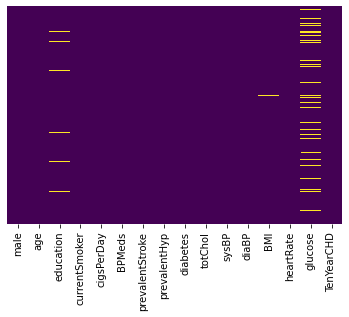

In [21]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

In [22]:
data['totChol'].isnull().sum()

0

In [23]:
data['BMI'].isnull().sum()

19

### Based on the small number of missing cells here we filling it directly by the mean = **25.802008**

In [24]:
data['BMI'] = data['BMI'].fillna(25.802008,inplace=False)

<AxesSubplot:>

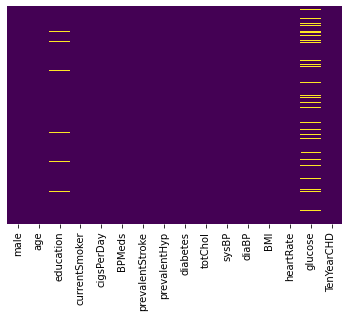

In [25]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

In [26]:
data['BMI'].isnull().sum()

0

In [27]:
data['glucose'].isnull().sum()

388

### That's a large numer of missing data 

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose'>

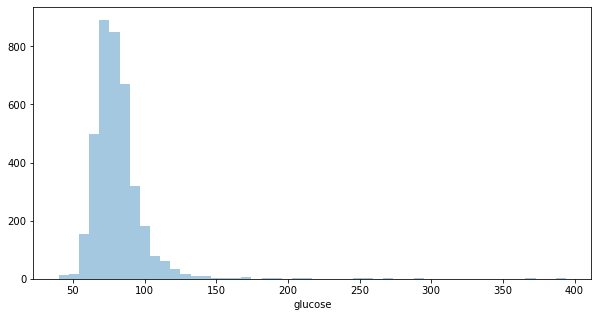

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data['glucose'],kde=False)

Insulin is a hormone that moves glucose from your blood into the cells for energy and storage. People with diabetes have higher-than-normal levels of glucose in their blood. Either they don't have enough insulin to move it through or their cells don't respond to insulin as well as they should.
### There is a medical relationship between glucose and diabetes in the human body, So let's explore that by plot

<AxesSubplot:xlabel='diabetes', ylabel='glucose'>

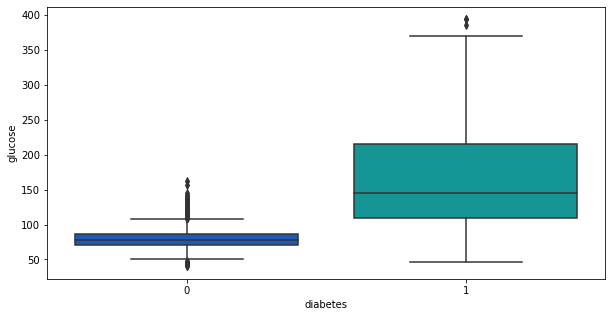

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='diabetes',y='glucose',data=data ,palette='winter')

**The mean glucose of people who have diabetes is greater than The mean glucose of people who do not have the diabetes**

So, let's fill the missing data for people who have **diabetes** by the mean = **170.333333**.
and people who do not have **diabetes** by mean = **79.489**

In [35]:
data[data['diabetes']==1].mean()

male                 0.477064
age                 54.926606
education            1.735849
currentSmoker        0.357798
cigsPerDay           6.293578
BPMeds               0.082569
prevalentStroke      0.009174
prevalentHyp         0.532110
diabetes             1.000000
totChol            247.657982
sysBP              147.444954
diaBP               86.582569
BMI                 27.962789
heartRate           79.504587
glucose            170.333333
TenYearCHD           0.366972
dtype: float64

In [36]:
data[data['diabetes']==0].mean()

male                 0.427949
age                 49.443933
education            1.985349
currentSmoker        0.497699
cigsPerDay           9.074594
BPMeds               0.027852
prevalentStroke      0.005813
prevalentHyp         0.304674
diabetes             0.000000
totChol            236.432860
sysBP              131.953984
diaBP               82.796077
BMI                 25.744966
heartRate           75.783188
glucose             79.489186
TenYearCHD           0.146282
dtype: float64

In [37]:
def impute_glucose(col):
    glucose = col[0]
    diabetes = col[1]
    
    if pd.isnull(glucose):
        if diabetes == 0:
            return  79.489186
        else:
            return  170.333333
    else:
        return glucose


In [38]:
data['glucose'] = data[['glucose', 'diabetes']].apply(impute_glucose, axis=1)

<AxesSubplot:>

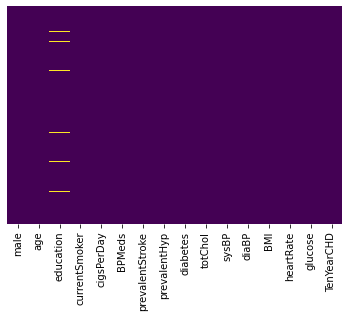

In [39]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

* The education is not important for our model, so we droped it.

In [40]:
data.drop('education',axis=1,inplace=True)

<AxesSubplot:>

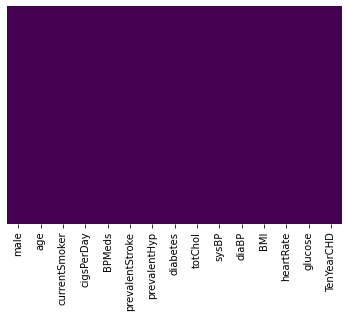

In [41]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False,cmap='viridis')

In [42]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

There is only one missing cell in the **heartRate**, 
filling it by mean.

In [45]:
data['heartRate'] = data['heartRate'].fillna(75.87,inplace=False)

In [46]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Now The data is cleaning , prepare and ready to training

In [47]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

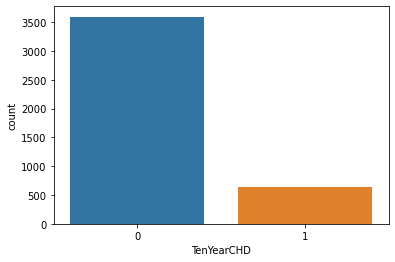

In [48]:
sns.countplot(x='TenYearCHD',data=data)

Here, the data is imbalanced we need to balance the data.
There are many ways to balance the data, we will choose **random over-smapling**

In [49]:
# Class count
count_class_0, count_class_1 = data['TenYearCHD'].value_counts()

# Divide by class
df_class_0 = data[data['TenYearCHD'] == 0]
df_class_1 = data[data['TenYearCHD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

(3594, 15)
(644, 15)


In [50]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [51]:
print(df_class_0.shape)
print(df_class_1_over.shape)
print(df_test_over.shape)

(3594, 15)
(3594, 15)
(7188, 15)


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

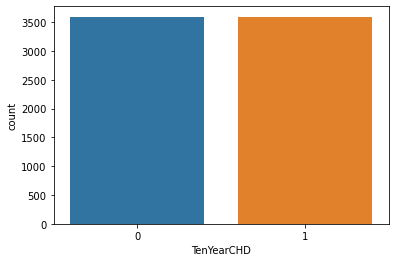

In [52]:
sns.countplot(x='TenYearCHD',data=df_test_over)

### Now The data is balanced and ready to fit it.

In [56]:
X =df_test_over.drop('TenYearCHD',axis=1)
y =df_test_over['TenYearCHD']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
log_model =LogisticRegression()

In [59]:
log_model.fit(X_train,y_train)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
predictions = log_model.predict(X_test)

In [61]:
print(confusion_matrix(y_test,predictions))

[[692 386]
 [388 691]]


In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1078
           1       0.64      0.64      0.64      1079

    accuracy                           0.64      2157
   macro avg       0.64      0.64      0.64      2157
weighted avg       0.64      0.64      0.64      2157

